In [4]:
import pandas as pd
import numpy as np

In [6]:
movie = pd.read_csv('movie_metadata.csv')

In [7]:
movie.head

<bound method NDFrame.head of       movie_code  duration  facenumber_in_poster      country       budget  \
0              1     178.0                   0.0          USA  237000000.0   
1              2     169.0                   0.0          USA  300000000.0   
2              3     148.0                   1.0           UK  245000000.0   
3              4     164.0                   0.0          USA  250000000.0   
4              5     132.0                   1.0          USA  263700000.0   
5              6     156.0                   0.0          USA  258000000.0   
6              7     100.0                   1.0          USA  260000000.0   
7              8     141.0                   4.0          USA  250000000.0   
8              9     153.0                   3.0           UK  250000000.0   
9             10     183.0                   0.0          USA  250000000.0   
10            11     169.0                   0.0          USA  209000000.0   
11            12     106.0        

In [9]:
#random sampling
sample1=movie.sample(n=100) sample2=movie.sample(frac=0.1) #default replace = flase, no replacement
sample1.to_csv("sample1.csv",sep=',')

In [10]:
sample2=movie.sample(frac=0.1) #default replace = flase, no replacement
sample2.to_csv("sample2.csv",sep=',')

In [13]:
#principal component analysis
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [14]:
pcademo=pd.read_csv('pcademo.csv')

In [17]:
pcademo.head()

,State,Census Resident Total Population - Apr-1-2000,Resident Total Population Estimate - Jul-1-2000,Resident Total Population Estimate - Jul-1-2001,Net Domestic Migration - Jul-1-2000,Net Domestic Migration - Jul-1-2001,Federal/Civilian Movement from Abroad - Jul-1-2000,Federal/Civilian Movement from Abroad - Jul-1-2001,Net International Migration - Jul-1-2000,Net International Migration - Jul-1-2001,...,Period Births - Jul-1-2001,Period Deaths - Jul-1-2000,Period Deaths - Jul-1-2001,Resident Under 65 Population Estimate - Jul-1-2000,Resident Under 65 Population Estimate - Jul-1-2001,Resident 65 Plus Population Estimate - Jul-1-2000,Resident 65 Plus Population Estimate - Jul-1-2001,Residual - Jul-1-2000,Residual - Jul-1-2001,Unnamed: 20
0,Alabama,4447100.0,4451493.0,4464356.0,-1434.0,-7966.0,17.0,-98.0,714.0,3079.0,...,64319.0,10622.0,45912.0,3870598.0,3880476.0,580895.0,583880.0,-94.0,-559.0,NaN
1,Alaska,626932.0,627601.0,634892.0,-1611.0,-1091.0,28.0,-152.0,379.0,1330.0,...,10128.0,679.0,2949.0,591644.0,598036.0,35957.0,36856.0,56.0,25.0,NaN
2,Arizona,5130632.0,5165274.0,5307331.0,17259.0,75633.0,37.0,-180.0,6124.0,22794.0,...,84295.0,9486.0,41217.0,4492186.0,4614912.0,673088.0,692419.0,222.0,732.0,NaN
3,Arkansas,2673400.0,2678030.0,2692090.0,1101.0,964.0,6.0,-36.0,739.0,2879.0,...,38629.0,6557.0,28286.0,2303817.0,2318055.0,374213.0,374035.0,0.0,-90.0,NaN
4,California,33871648.0,34000446.0,34501130.0,-19015.0,-69499.0,336.0,-1515.0,71852.0,271841.0,...,530349.0,54040.0,231693.0,30389907.0,30845002.0,3610539.0,3656128.0,-112.0,1201.0,NaN


In [18]:
#feature up the feature
feature=pcademo.iloc[0:50,1:20]
feature.tail()

,Census Resident Total Population - Apr-1-2000,Resident Total Population Estimate - Jul-1-2000,Resident Total Population Estimate - Jul-1-2001,Net Domestic Migration - Jul-1-2000,Net Domestic Migration - Jul-1-2001,Federal/Civilian Movement from Abroad - Jul-1-2000,Federal/Civilian Movement from Abroad - Jul-1-2001,Net International Migration - Jul-1-2000,Net International Migration - Jul-1-2001,Period Births - Jul-1-2000,Period Births - Jul-1-2001,Period Deaths - Jul-1-2000,Period Deaths - Jul-1-2001,Resident Under 65 Population Estimate - Jul-1-2000,Resident Under 65 Population Estimate - Jul-1-2001,Resident 65 Plus Population Estimate - Jul-1-2000,Resident 65 Plus Population Estimate - Jul-1-2001,Residual - Jul-1-2000,Residual - Jul-1-2001
45,608827.0,609709.0,613090.0,440.0,1705.0,0.0,-1.0,136.0,700.0,1545.0,6327.0,1202.0,5226.0,531993.0,534733.0,77716.0,78357.0,-37.0,-124.0
46,7078515.0,7104016.0,7187734.0,8119.0,18299.0,232.0,-1212.0,5721.0,22619.0,24352.0,100188.0,13158.0,57337.0,6308235.0,6380181.0,795781.0,807553.0,235.0,1161.0
47,5894121.0,5908372.0,5987973.0,425.0,21995.0,83.0,-444.0,5249.0,22052.0,19388.0,80339.0,10365.0,44681.0,5244172.0,5317341.0,664200.0,670632.0,-529.0,340.0
48,1808344.0,1807099.0,1801916.0,-1411.0,-4442.0,0.0,-1.0,129.0,491.0,5041.0,20436.0,4937.0,21435.0,1530334.0,1526360.0,276765.0,275556.0,-67.0,-232.0
49,5363675.0,5372243.0,5401906.0,1536.0,2974.0,0.0,-5.0,1571.0,6056.0,16696.0,68631.0,11058.0,47276.0,4669153.0,4698404.0,703090.0,703502.0,-177.0,-717.0


[ 72.49  87.88  93.46  97.1   98.81  99.58  99.93  99.98  99.99 100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.  ]


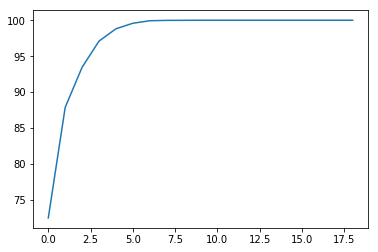

In [24]:
#convert it to numpy arrays
x=feature.values

#scaling the value
x=scale(x)
pca=PCA(n_components=19)
pca.fit(x)

#the amount of variance that each PC explain
var=pca.explained_variance_ratio_

#cummulative variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

print(var1)
plt.plot(var1)

In [27]:
pca=PCA(n_components=4)
pca.fit(x)
x1=pca.fit_transform(x)
print(x1)

[[-8.80471905e-01 -6.71031789e-01  3.25014247e-01  8.15812605e-03]
 [-2.70857159e+00  2.83164244e-01 -8.29650450e-01  3.45889263e-01]
 [-2.02354077e-01  2.28890329e+00  5.81939269e-01 -7.18783302e-01]
 [-1.77320443e+00 -4.47039704e-02 -3.77825346e-02 -2.65193318e-01]
 [ 1.77178258e+01 -8.63637131e-01 -7.93825925e-01  2.23410245e+00]
 [-7.14157323e-01  1.85848940e+00 -3.89078519e-01 -2.86469047e-01]
 [-1.49047290e+00 -1.01883215e+00  5.43999940e-01  4.33660900e-01]
 [-2.79125757e+00  4.54741743e-02 -2.30083751e-01  9.71631936e-02]
 [-2.79318163e+00 -3.17661949e-02 -6.78149876e-01  5.31710238e-02]
 [ 7.04821367e+00  5.18779926e+00  3.35762687e+00 -1.78235961e+00]
 [ 1.88235959e+00  4.09249190e+00 -1.13541249e+00 -9.03626304e-01]
 [-2.11838444e+00  2.72753795e-01 -9.03828909e-01  1.07681233e+00]
 [-2.47626018e+00  4.98768623e-01 -5.12712776e-01 -2.75920888e-01]
 [ 4.09405189e+00 -1.45260107e+00 -1.50471603e+00 -1.23903063e+00]
 [-2.21323952e-01 -8.37256781e-01  6.24256595e-01 -4.51413018e

In [28]:
feature1=pd.DataFrame(x1)
feature.head()

,Census Resident Total Population - Apr-1-2000,Resident Total Population Estimate - Jul-1-2000,Resident Total Population Estimate - Jul-1-2001,Net Domestic Migration - Jul-1-2000,Net Domestic Migration - Jul-1-2001,Federal/Civilian Movement from Abroad - Jul-1-2000,Federal/Civilian Movement from Abroad - Jul-1-2001,Net International Migration - Jul-1-2000,Net International Migration - Jul-1-2001,Period Births - Jul-1-2000,Period Births - Jul-1-2001,Period Deaths - Jul-1-2000,Period Deaths - Jul-1-2001,Resident Under 65 Population Estimate - Jul-1-2000,Resident Under 65 Population Estimate - Jul-1-2001,Resident 65 Plus Population Estimate - Jul-1-2000,Resident 65 Plus Population Estimate - Jul-1-2001,Residual - Jul-1-2000,Residual - Jul-1-2001
0,4447100.0,4451493.0,4464356.0,-1434.0,-7966.0,17.0,-98.0,714.0,3079.0,15812.0,64319.0,10622.0,45912.0,3870598.0,3880476.0,580895.0,583880.0,-94.0,-559.0
1,626932.0,627601.0,634892.0,-1611.0,-1091.0,28.0,-152.0,379.0,1330.0,2496.0,10128.0,679.0,2949.0,591644.0,598036.0,35957.0,36856.0,56.0,25.0
2,5130632.0,5165274.0,5307331.0,17259.0,75633.0,37.0,-180.0,6124.0,22794.0,20486.0,84295.0,9486.0,41217.0,4492186.0,4614912.0,673088.0,692419.0,222.0,732.0
3,2673400.0,2678030.0,2692090.0,1101.0,964.0,6.0,-36.0,739.0,2879.0,9341.0,38629.0,6557.0,28286.0,2303817.0,2318055.0,374213.0,374035.0,0.0,-90.0
4,33871648.0,34000446.0,34501130.0,-19015.0,-69499.0,336.0,-1515.0,71852.0,271841.0,129777.0,530349.0,54040.0,231693.0,30389907.0,30845002.0,3610539.0,3656128.0,-112.0,1201.0


In [29]:
movie.head()

,movie_code,duration,facenumber_in_poster,country,budget,gross,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,imdb_score,imdb_score_class
0,1,178.0,0.0,USA,237000000.0,760505847.0,886204,3054.0,723.0,33000,0.0,1000.0,936.0,855.0,4834,7.9,Good
1,2,169.0,0.0,USA,300000000.0,309404152.0,471220,1238.0,302.0,0,563.0,40000.0,5000.0,1000.0,48350,7.1,Good
2,3,148.0,1.0,UK,245000000.0,200074175.0,275868,994.0,602.0,85000,0.0,11000.0,393.0,161.0,11700,6.8,Good
3,4,164.0,0.0,USA,250000000.0,448130642.0,1144337,2701.0,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,8.5,Excellent
4,5,132.0,1.0,USA,263700000.0,73058679.0,212204,738.0,462.0,24000,475.0,640.0,632.0,530.0,1873,6.6,Good


In [31]:
movie['provit']=movie.gross-movie.budget

In [32]:
movie.head()

,movie_code,duration,facenumber_in_poster,country,budget,gross,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,imdb_score,imdb_score_class,provit
0,1,178.0,0.0,USA,237000000.0,760505847.0,886204,3054.0,723.0,33000,0.0,1000.0,936.0,855.0,4834,7.9,Good,523505847.0
1,2,169.0,0.0,USA,300000000.0,309404152.0,471220,1238.0,302.0,0,563.0,40000.0,5000.0,1000.0,48350,7.1,Good,9404152.0
2,3,148.0,1.0,UK,245000000.0,200074175.0,275868,994.0,602.0,85000,0.0,11000.0,393.0,161.0,11700,6.8,Good,-44925825.0
3,4,164.0,0.0,USA,250000000.0,448130642.0,1144337,2701.0,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,8.5,Excellent,198130642.0
4,5,132.0,1.0,USA,263700000.0,73058679.0,212204,738.0,462.0,24000,475.0,640.0,632.0,530.0,1873,6.6,Good,-190641321.0
